In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import researchpy as rp
import numpy as np
import datetime
from sklearn.utils import compute_sample_weight
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import plot_importance as pi
import pickle

In [2]:
data = pd.read_csv('../data/embedded_datasets/metrics_dataset.csv')
x = data.drop(columns=['label', 'sample_id', 'severity', 'lcc', 'tcc'])

In [3]:
data.head()

,sample_id,severity,cbo,wmc,dit,rfc,lcom,tcc,lcc,totalMethodsQty,...,innerClassesQty,lambdasQty,uniqueWordsQty,modifiers,logStatementsQty,from_project,label,type_class,type_innerclass,type_interface
0,4432196,major,3,12,1,0,54,0.0,0.0,12,...,0,0,21,1,0,1,1,1.0,0.0,0.0
1,7391055,major,3,0,1,0,0,-1.0,-1.0,0,...,0,0,12,1,0,1,1,1.0,0.0,0.0
2,4687786,major,6,28,1,16,14,0.0,0.0,17,...,0,0,96,1,0,1,1,1.0,0.0,0.0
3,3797964,major,0,0,1,0,0,-1.0,-1.0,0,...,0,0,5,9,0,1,1,0.0,1.0,0.0
4,5339993,major,2,3,2,0,0,0.0,0.0,3,...,0,0,10,1,0,1,1,1.0,0.0,0.0


In [4]:
features_importance = np.zeros(len(x.columns))
model_path_base = '../data/saved_models/metrics_dataset_'
for rand_seed in range(51):
    model_path = model_path_base + str(rand_seed) + '.pkl'
    with open(model_path, "rb") as input_file:
        pipeline = pickle.load(input_file)
    
    model = pipeline[1]
#     print(model)
    feature_importances = model.feature_importances_
    ind = np.argpartition(feature_importances, -5)[-5:]
    k = ind[np.argsort(feature_importances[ind])][::-1]
    features_importance[k] = features_importance[k] + 1

In [5]:
ind = np.argpartition(features_importance, -10)[-10:]
k = ind[np.argsort(features_importance[ind])][::-1]
k

array([15,  3,  7, 18,  0, 11, 32, 34, 25, 35])

In [6]:
features_importance[k]

array([51., 50., 50., 36., 24., 20.,  7.,  4.,  4.,  3.])

In [7]:
x.columns[k]

Index(['staticFieldsQty', 'rfc', 'publicMethodsQty', 'protectedFieldsQty',
       'cbo', 'abstractMethodsQty', 'assignmentsQty', 'variablesQty',
       'returnQty', 'maxNestedBlocksQty'],
      dtype='object')

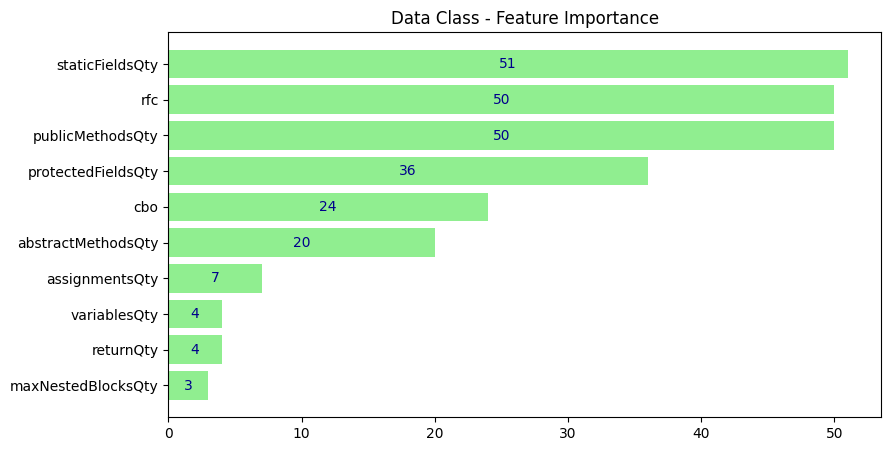

In [8]:
fig, ax = plt.subplots(figsize=(9.2, 5))
plt.barh(range(10), width=features_importance[k][::-1], tick_label=x.columns[k[::-1]], color='lightgreen')
widths = features_importance[k][::-1]
xcenters = widths / 2
for y, (x_ax, c) in enumerate(zip(xcenters, widths)):
            ax.text(x_ax, y, str(int(c)), ha='center', va='center',
                    color='darkblue')
plt.title("Data Class - Feature Importance")
plt.show()